
===== PERHITUNGAN MANUAL HUKUM NEWTON III =====

1) Data awal
m = 0.25 kg
v_awal = 8.0 m/s
v_akhir = -5.0 m/s
Δt = 1.2 s

2) Perubahan kecepatan
Δv = -5.0 - 8.0 = -13.0 m/s

3) Perubahan momentum
Δp = m × Δv = 0.25 × -13.0 = -3.25 kg·m/s

4) Gaya kontak rata-rata
F = Δp / Δt = -3.25 / 1.2 = -2.708 N
→ gaya aksi = gaya reaksi (Newton III)

5) Waktu mencapai tembok
t = x / v = 3.0 / 8.0 = 0.375 s

6) Gaya gesek
f = μmg = 0.25 × 0.25 × 9.8 = 0.6125 N

7) Perlambatan akibat gesek
a = f / m = 0.6125 / 0.25 = 2.450 m/s²

===== SELESAI =====



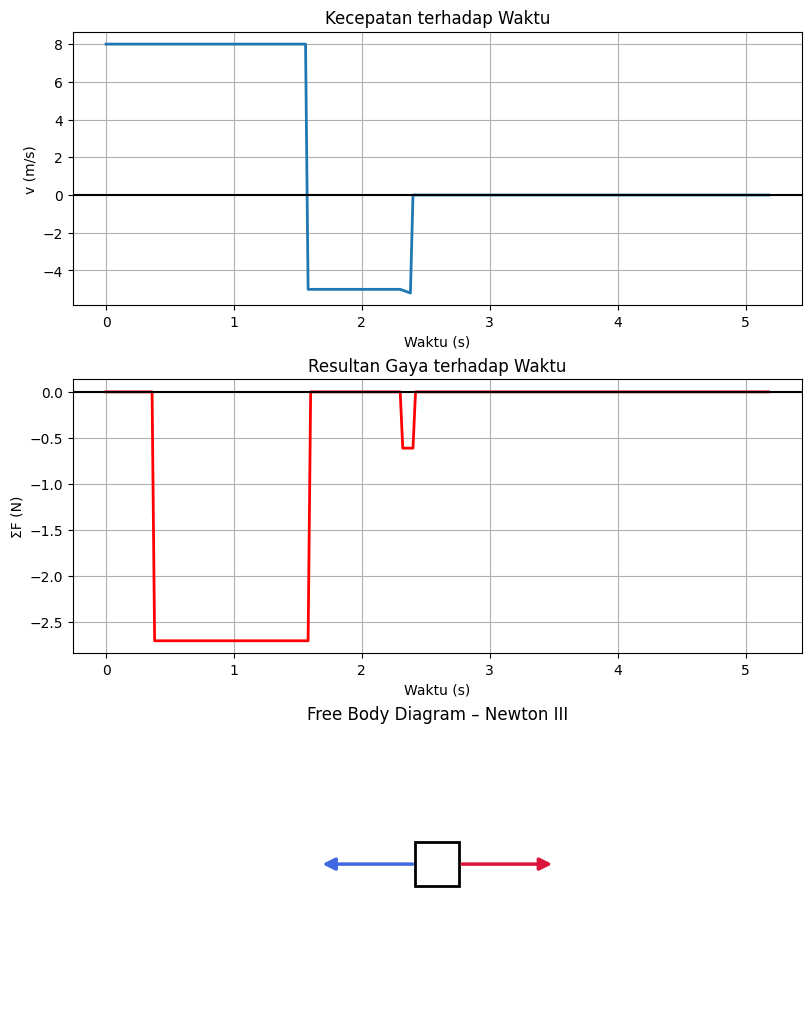

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle, Rectangle, FancyArrowPatch
from IPython.display import HTML, display
import matplotlib as mpl

mpl.rcParams['animation.embed_limit'] = 30

# ==========================================================
# 1. PARAMETER FISIKA
# ==========================================================
m = 0.25          # massa (kg)
v_awal = 8.0      # kecepatan awal (m/s)
v_akhir = -5.0    # kecepatan akhir (m/s)
t_kontak = 1.2    # waktu kontak (s)
g = 9.8           # gravitasi (m/s^2)
mu = 0.25         # koefisien gesek

dt = 0.02
steps = 260

x_wall = 3.0
y_ground = -0.8
x_stop = -1.0

# ==========================================================
# 2. PERHITUNGAN MANUAL (RAPI)
# ==========================================================
print("\n===== PERHITUNGAN MANUAL HUKUM NEWTON III =====\n")

delta_v = v_akhir - v_awal
delta_p = m * delta_v
F_kontak = delta_p / t_kontak
t_ke_tembok = x_wall / v_awal
F_gesek = mu * m * g
a_gesek = F_gesek / m

print("1) Data awal")
print(f"m = {m} kg")
print(f"v_awal = {v_awal} m/s")
print(f"v_akhir = {v_akhir} m/s")
print(f"Δt = {t_kontak} s\n")

print("2) Perubahan kecepatan")
print(f"Δv = {v_akhir} - {v_awal} = {delta_v} m/s\n")

print("3) Perubahan momentum")
print(f"Δp = m × Δv = {m} × {delta_v} = {delta_p} kg·m/s\n")

print("4) Gaya kontak rata-rata")
print(f"F = Δp / Δt = {delta_p} / {t_kontak} = {F_kontak:.3f} N")
print("→ gaya aksi = gaya reaksi (Newton III)\n")

print("5) Waktu mencapai tembok")
print(f"t = x / v = {x_wall} / {v_awal} = {t_ke_tembok:.3f} s\n")

print("6) Gaya gesek")
print(f"f = μmg = {mu} × {m} × {g} = {F_gesek:.4f} N\n")

print("7) Perlambatan akibat gesek")
print(f"a = f / m = {F_gesek:.4f} / {m} = {a_gesek:.3f} m/s²")

print("\n===== SELESAI =====\n")

# ==========================================================
# 3. SIMULASI GERAK
# ==========================================================
x, y = 0.0, 0.0
vx, vy = v_awal, 0.0
fase = "maju"

positions, times, phases = [], [], []
velocities, forces = [], []

t_kontak_awal = t_ke_tembok
t_kontak_akhir = t_kontak_awal + t_kontak

for i in range(steps):
    t = i * dt
    F_now = 0

    if fase == "maju":
        x += vx * dt
        if x >= x_wall:
            fase = "kontak"

    elif fase == "kontak":
        F_now = F_kontak
        if t >= t_kontak_akhir:
            vx = v_akhir
            vy = 2.5
            fase = "pantul"

    elif fase == "pantul":
        vy -= g * dt
        x += vx * dt
        y += vy * dt
        if y <= y_ground:
            y = y_ground
            vy = 0
            fase = "gelinding"

    elif fase == "gelinding":
        x += vx * dt
        vx -= mu * g * dt      # arah gesek BENAR
        F_now = -F_gesek
        if x <= x_stop or abs(vx) < 0.1:
            vx = 0
            x = max(x, x_stop)
            fase = "diam"

    positions.append((x, y))
    times.append(t)
    phases.append(fase)
    velocities.append(vx)
    forces.append(F_now)

# ==========================================================
# 4. ANIMASI (RATA TENGAH)
# ==========================================================
fig_anim, ax_anim = plt.subplots(figsize=(8, 4))

def update(i):
    ax_anim.clear()
    x, y = positions[i]
    fase = phases[i]

    ax_anim.plot([-1.5, 6], [y_ground, y_ground], color="black")
    ax_anim.add_patch(Rectangle((x_wall, -1.2), 0.25, 2.4, color="gray"))
    ax_anim.add_patch(Circle((x, y), 0.18, color="orange", ec="black"))

    if fase == "kontak":
        ax_anim.arrow(x_wall + 0.25, 0.4, 0.9, 0,
                      head_width=0.1, color="crimson", lw=3)
        ax_anim.arrow(x_wall - 1.2, 0.4, -0.9, 0,
                      head_width=0.1, color="royalblue", lw=3)

    ax_anim.set_xlim(-1.5, 6)
    ax_anim.set_ylim(-1.5, 1.5)
    ax_anim.set_aspect("equal")
    ax_anim.set_title("Hukum Newton III – Aksi dan Reaksi")
    ax_anim.grid(True)

ani = FuncAnimation(fig_anim, update,
                    frames=len(positions),
                    interval=70)

plt.close(fig_anim)
display(HTML(ani.to_jshtml()))

# ==========================================================
# 5. GRAFIK & FREE BODY DIAGRAM (SEMUA TENGAH)
# ==========================================================
fig, axs = plt.subplots(3, 1, figsize=(8, 10), constrained_layout=True)

# Kecepatan v(t)
axs[0].plot(times, velocities, lw=2)
axs[0].axhline(0, color="black")
axs[0].set_title("Kecepatan terhadap Waktu")
axs[0].set_xlabel("Waktu (s)")
axs[0].set_ylabel("v (m/s)")
axs[0].grid(True)

# Resultan gaya ΣF(t)
axs[1].plot(times, forces, lw=2, color="red")
axs[1].axhline(0, color="black")
axs[1].set_title("Resultan Gaya terhadap Waktu")
axs[1].set_xlabel("Waktu (s)")
axs[1].set_ylabel("ΣF (N)")
axs[1].grid(True)

# Free Body Diagram
axs[2].set_title("Free Body Diagram – Newton III")
axs[2].set_aspect("equal")
axs[2].axis("off")
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

cx, cy = 0.5, 0.5
L = 0.35

axs[2].add_patch(Rectangle(
    (cx-0.08, cy-0.08),
    0.16, 0.16,
    ec="black", fc="none", lw=2
))

axs[2].add_patch(FancyArrowPatch(
    (cx-0.08, cy),
    (cx-0.08-L, cy),
    arrowstyle='-|>', mutation_scale=18,
    lw=2.5, color='royalblue'
))

axs[2].add_patch(FancyArrowPatch(
    (cx+0.08, cy),
    (cx+0.08+L, cy),
    arrowstyle='-|>', mutation_scale=18,
    lw=2.5, color='crimson'
))

plt.show()